# Actividad - Estadística básica

* **Nombre:** José Pablo Martínez Valdivia
* **Matrícula:** A01275676

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [18]:
# Carga las librerías necesarias.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
uploaded = files.upload()
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

Saving bestsellers with categories.csv to bestsellers with categories.csv


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

In [3]:
# Crea una tabla resumen con los estadísticas generales de las variables
# numéricas.
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Text(0, 0.5, 'Publicaciones')

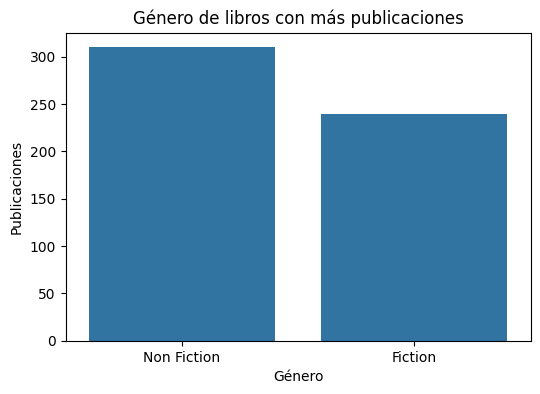

In [42]:
## ¿Cuál es el género con más publicaciones? Muéstralo en un gráfico.
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Genre')
plt.title('Género de libros con más publicaciones')
plt.xlabel('Género')
plt.ylabel('Publicaciones')

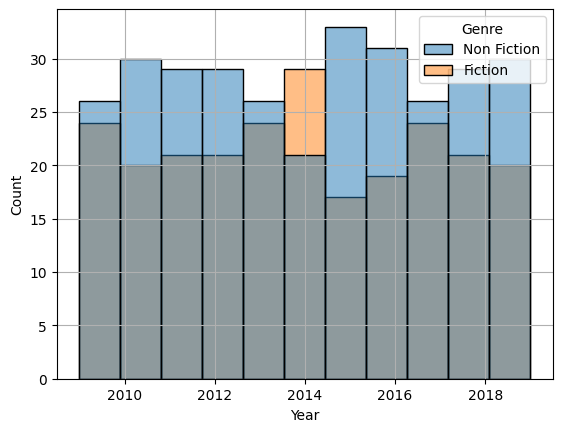

In [71]:
# ¿Cuántos libros del top 50 se publicaron por género en cada año? ¿Hay algún
# año donde hubo más libros de ficción en el top 50?. Muéstralo en un gráfico.
sns.histplot(data=df, x='Year', hue='Genre')
plt.grid(True)

Text(0.5, 0, 'Reseñas')

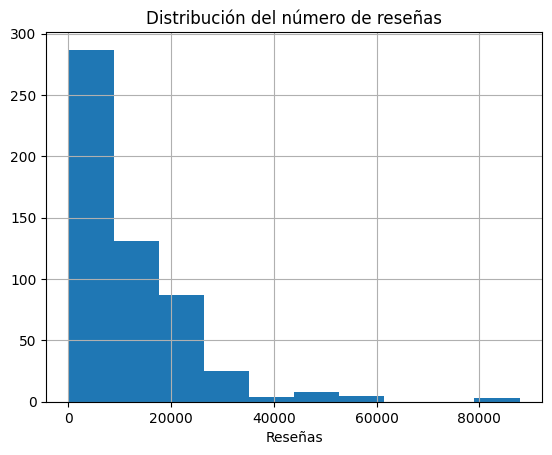

In [79]:
# ¿Cómo se distribuye la variable Review? Muéstra el histografa.
df['Reviews'].hist()
plt.title('Distribución del número de reseñas')
plt.xlabel('Reseñas')

Text(0.5, 0, 'Reseñas')

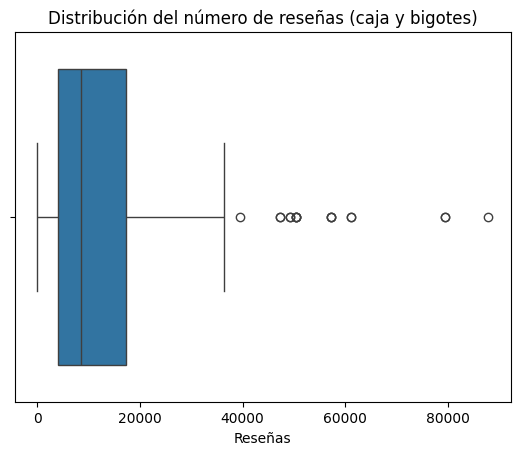

In [80]:
# Ahora muéstralo en un gráfico de caja y bigote.
sns.boxplot(data=df, x='Reviews')
plt.title('Distribución del número de reseñas (caja y bigotes)')
plt.xlabel('Reseñas')

Text(0, 0.5, 'Género')

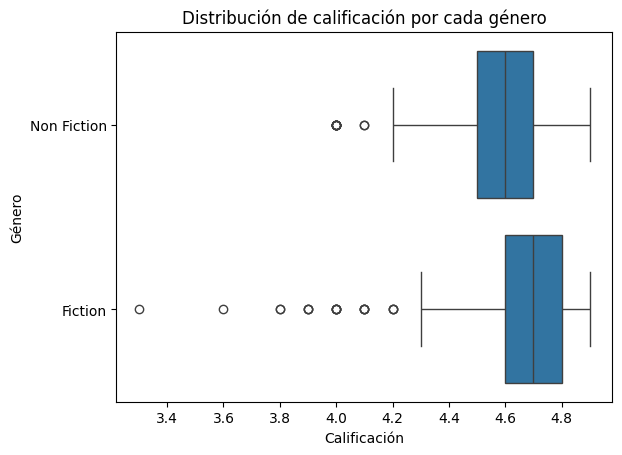

In [88]:
# ¿Cómo se compara la evaluación del libro por género? ¿Qué genero es mejor
# evaluado por los lectores? Muéstralo en un solo gráfico de caja y bigote.
sns.boxplot(data=df, x='User Rating', y='Genre')
plt.title('Distribución de calificación por cada género')
plt.xlabel('Calificación')
plt.ylabel('Género')

<Axes: xlabel='Reviews', ylabel='Price'>

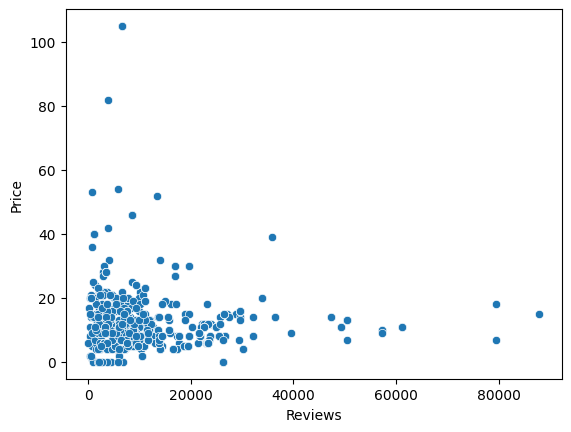

In [89]:
# ¿Cuál es la relación entre el número de reseñas y precios? Muéstralo en un
# gráfico de dispersión.
sns.scatterplot(data=df, x='Reviews', y='Price')

<Axes: xlabel='Reviews', ylabel='Price'>

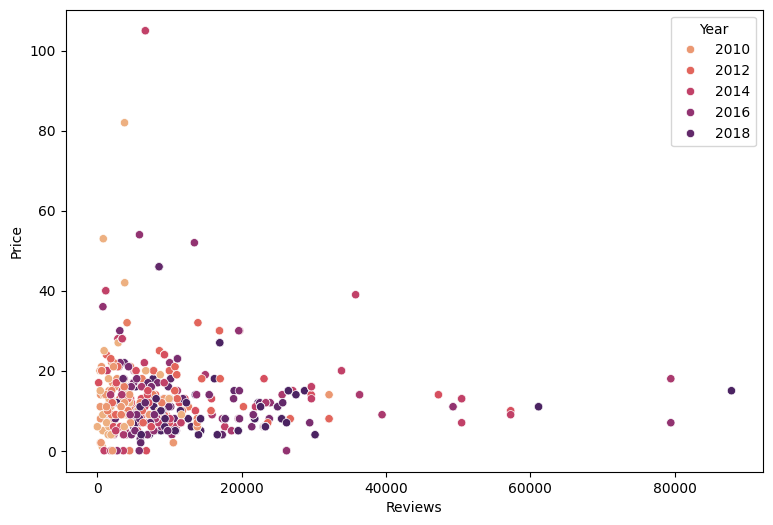

In [106]:
# De la pregunta anterior, ¿influye algo el año de publicación? ¿Cuál es la
# relación entre el número de reseñar, el precio y el año de publicación?
# IMPORTANTE: Selecciona una paleta de colores adeacuada.
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='Reviews', y='Price', hue='Year', palette='flare')

<Axes: >

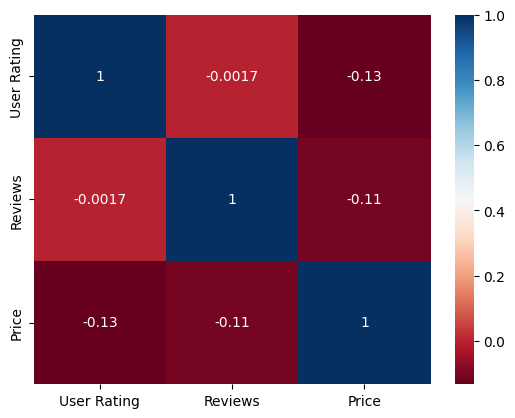

In [118]:
# ¿Cuál es la correlación entre las variables numéricas? Muéstralo en un
# gráfico. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.
ndf = df[['User Rating', 'Reviews', 'Price']]
sns.heatmap(data=ndf.corr(), annot=True, cmap='RdBu')

¿Cuáles variables tiene una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa? (Esta pregunta no es de código) Responde la pregunta en la siguiente celda de texto.

 Las correlaciones no son muy fuertes pero la más fuerte es negativa y entre el Precio y el Rating de usuarios

Text(0.5, 1.05, 'Gráfico de pares de variables numéricas por género de libro')

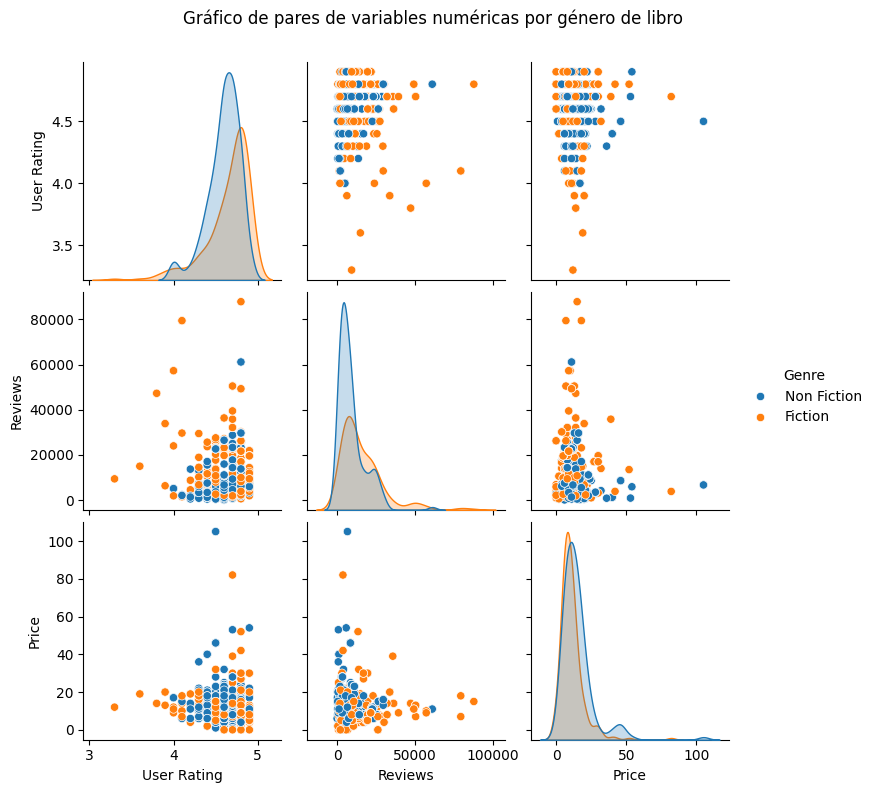

In [130]:
# Haz una gráfica donde podemos comparar la relación entre las tres variables
# numéricas (User Rating, Reviews y Price) y que, además, podamos ver el efecto
# del libro. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.
sns.pairplot(data=df.drop('Year', axis=1), hue='Genre')
plt.suptitle('Gráfico de pares de variables numéricas por género de libro', y=1.05)